# Customer Segmentation and Retention in Personal Vehicle Insurance 

## Objective
The objective of this analysis is to deliver actionable insights into customer behavior and risk management within the personal vehicle insurance industry. This analysis focuses on:
- Understanding the effects of discount combinations on claims.
- Monitoring premium and cancellation trends.
- Evaluating age-related risk factors.
- Analyzing churn rates across different credit score groups.

These insights are intended to support data-driven decision-making, enhance customer retention, and optimize pricing strategies.

## Business Requirements
The business requires a detailed analysis of customer segmentation and retention metrics to:
- Identify high-risk customer segments.
- Assess the effectiveness of various discount strategies.
- Improve customer retention efforts.


### Data Scope

This project involves working with multiple datasets categorized as internal and external. Since external datasets take more time to obtain—due to being sourced from outside the team—we will start with these. Internal datasets are already available and will be processed later.

We will begin by preparing a credit ordering file for the credit bureau to obtain the credit scores of policyholders.

### Data Structure of the Fixed-Width Customer Text Files

- **1-10**: `subscriber_number`
- **11-12**: `province`
- **13-18**: `PCOD`
- **19-33**: `CITY_name`
- **34-63**: `ADDRESS`
- **64-93**: `FIRST_NAME`
- **94-123**: `LAST_NAME`
- **124-125**: `CLIENT_ID`
- **126-**: `client_Birthdate`

**import Fixed-Customer Order Text Files and Data Wrangling**

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
#list of files
list_files = [r"C:\Users\Jay\Desktop\DA\Insurance\Session 1\RI1_fixed_width.TXT",r"C:\Users\Jay\Desktop\DA\Insurance\Session 1\RI2_fixed_width.TXT",
         r"C:\Users\Jay\Desktop\DA\Insurance\Session 1\RI3_fixed_width.TXT",
        r"C:\Users\Jay\Desktop\DA\Insurance\Session 1\RI4_fixed_width.TXT"]

In [160]:
#function to read fixed width file
def read_ri_file(file):
    return pd.read_fwf(file, colspecs=[
        (0, 10),   # subscriber_number
        (10, 12),  # province
        (12, 18),  # PCOD
        (18, 33),  # CITY_name
        (33, 63),  # ADDRESS
        (63, 93),  # FIRST_NAME
        (93, 123), # LAST_NAME
        (123, 125),# CLIENT_ID
        (125, 135) # client_Birthdate
    ], names=[
        'subscriber_number', 'province', 'PCOD', 'CITY_name',
        'ADDRESS', 'FIRST_NAME', 'LAST_NAME', 'CLIENT_ID', 'client_Birthdate'
    ], dtype=str)

In [161]:
#Read all files and concatenate them
RI= pd.concat([read_ri_file(f) for f in list_files], ignore_index=True)
print(RI.head())

  subscriber_number province    PCOD CITY_name     ADDRESS   FIRST_NAME LAST_NAME CLIENT_ID client_Birthdate
0        0186849052       NB  E1A7K8    DIEPPE  RUE RMIRRU  L & JOSETTE    TNAULT        02       1944-08-04
1        0186859052       NB  E1C3E7    MONCTO    ITT RVE.           NY     UNEAU        01       1965-04-30
2        0186869052       NB  E2N1J6    LAKEWO  EILR RVENU           AN       YRY        01       1945-12-11
3        0186879052       NB  E2N1J6    LAKEWO  EILR RVENU           AN       YRY        02       1949-09-13
4        0186889052       NB  E4V1X5     NOTRE  CH. COCRGN            N      DARD        01       1949-04-03


In [162]:
#check column's data type and number of missing values
RI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscriber_number  547 non-null    object
 1   province           549 non-null    object
 2   PCOD               547 non-null    object
 3   CITY_name          522 non-null    object
 4   ADDRESS            547 non-null    object
 5   FIRST_NAME         535 non-null    object
 6   LAST_NAME          526 non-null    object
 7   CLIENT_ID          549 non-null    object
 8   client_Birthdate   549 non-null    object
dtypes: object(9)
memory usage: 38.7+ KB


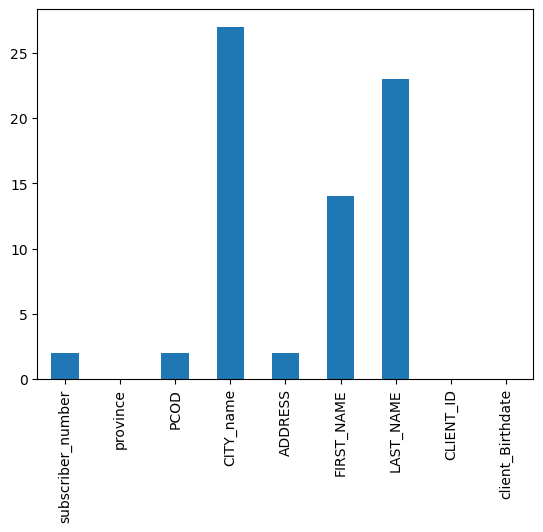

In [163]:
#check number of missing values for each column
null_summary = RI.isnull().sum()
null_summary.plot(kind='bar')
plt.show()

In [164]:
#Check rows with missing subscriber_number
rows_with_nulls = RI[RI['subscriber_number'].isnull()]
print(rows_with_nulls)

    subscriber_number province PCOD CITY_name ADDRESS FIRST_NAME LAST_NAME CLIENT_ID client_Birthdate
151               NaN       na  NaN       NaN     NaN        NaN       NaN        na              NaT
548               NaN       na  NaN       NaN     NaN        NaN       NaN        na              NaT


In [165]:
#Remove records that doesnt have subscriber_number
RI=RI.dropna(subset=['subscriber_number'])
RI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 547
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscriber_number  547 non-null    object
 1   province           547 non-null    object
 2   PCOD               547 non-null    object
 3   CITY_name          522 non-null    object
 4   ADDRESS            547 non-null    object
 5   FIRST_NAME         535 non-null    object
 6   LAST_NAME          526 non-null    object
 7   CLIENT_ID          547 non-null    object
 8   client_Birthdate   547 non-null    object
dtypes: object(9)
memory usage: 42.7+ KB


In [166]:
#Remove any duplicate rows
RI=RI.drop_duplicates()

In [167]:
# sort by policy number
# keep first occurence of policy number
RI_sorted = RI.sort_values(by='subscriber_number')
uniq_ri = RI_sorted.drop_duplicates(subset='subscriber_number')
RI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 547
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscriber_number  459 non-null    object
 1   province           459 non-null    object
 2   PCOD               459 non-null    object
 3   CITY_name          442 non-null    object
 4   ADDRESS            459 non-null    object
 5   FIRST_NAME         447 non-null    object
 6   LAST_NAME          438 non-null    object
 7   CLIENT_ID          459 non-null    object
 8   client_Birthdate   459 non-null    object
dtypes: object(9)
memory usage: 35.9+ KB


In [168]:
#Check province distribution
Prov_freq=uniq_ri['province'].value_counts(dropna=False)
print(Prov_freq)

province
ON    327
NB    132
Name: count, dtype: int64


In [169]:
# drop rows where first name and last name doesn't exist
uniq_ri.dropna(subset=['FIRST_NAME','LAST_NAME'],inplace=True)
uniq_ri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 547
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscriber_number  427 non-null    object
 1   province           427 non-null    object
 2   PCOD               427 non-null    object
 3   CITY_name          410 non-null    object
 4   ADDRESS            427 non-null    object
 5   FIRST_NAME         427 non-null    object
 6   LAST_NAME          427 non-null    object
 7   CLIENT_ID          427 non-null    object
 8   client_Birthdate   427 non-null    object
dtypes: object(9)
memory usage: 33.4+ KB


In [170]:
#define a function to check if name only contains alphabetic characters
import re
def is_alpha(name):
    return bool(re.match("^[a-zA-Z]+$",name))

# Apply the function to each column and create a boolean mask
uniq_ri['FIRST_NAME_Clean'] = uniq_ri['FIRST_NAME'].apply(is_alpha)
uniq_ri['LAST_NAME_Clean'] = uniq_ri['LAST_NAME'].apply(is_alpha)

non_clean_rows = uniq_ri[~(uniq_ri['FIRST_NAME_Clean'] & uniq_ri['LAST_NAME_Clean'])]

print("Rows with non-alphabetic FIRST_NAME or LAST_NAME:")
print(non_clean_rows)

Rows with non-alphabetic FIRST_NAME or LAST_NAME:
    subscriber_number province    PCOD CITY_name     ADDRESS         FIRST_NAME LAST_NAME CLIENT_ID client_Birthdate  FIRST_NAME_Clean  LAST_NAME_Clean
0          0186849052       NB  E1A7K8    DIEPPE  RUE RMIRRU        L & JOSETTE    TNAULT        02       1944-08-04             False             True
5          0186899052       NB  E1C3M6    MONCTO  WRRD RVE.,         HEL & ANNA      CANC        01       1964-09-03             False             True
6          0186909052       NB  E1C3M6    MONCTO  WRRD RVE.,         HEL & ANNA      CANC        02       1972-07-18             False             True
7          0186919052       NB  E4P4M5    POINTE   NTER LRNE                2NE      SESS        01       1947-09-28             False             True
10         0186949055       NB  E1N6C6     SOUTH   ROUTE RRW  VIN W. & MARCELLA     THETT        01       1958-08-11             False             True
..                ...      ...     ...

In [171]:
#remove digis from first_name and extract part before “-，& ，space" as first_name
def clean_name(name):
    # Remove any numbers
    name = re.sub(r'\d+', '', name)
    # Extract the part before the first space or ampersand
    name = re.split(r'[ &-]', name)[0]
    return name.strip()
uniq_ri['FIRST_NAME']=uniq_ri['FIRST_NAME'].apply(clean_name)

uniq_ri['FIRST_NAME_Clean'] = uniq_ri['FIRST_NAME'].apply(is_alpha)
uniq_ri['LAST_NAME_Clean'] = uniq_ri['LAST_NAME'].apply(is_alpha)

non_clean_rows = uniq_ri[~(uniq_ri['FIRST_NAME_Clean'] & uniq_ri['LAST_NAME_Clean'])]

print("Rows with non-alphabetic FIRST_NAME or LAST_NAME:")
print(non_clean_rows)

Rows with non-alphabetic FIRST_NAME or LAST_NAME:
    subscriber_number province    PCOD CITY_name     ADDRESS FIRST_NAME LAST_NAME CLIENT_ID client_Birthdate  FIRST_NAME_Clean  LAST_NAME_Clean
77         0187619056       NB  E9B2G7    BLACKV  LIHRN LRNE     XANDER   .IN JR.        01       1970-05-09              True            False
78         0187629056       NB  E9B2G7    BLACKV  LIHRN LRNE     XANDER   .IN JR.        02       1971-10-07              True            False
267        0815740038       ON  P4N5C4    UPSTAI  RRLES STRE                  NIN        01       1983-05-08             False             True
285        0815920038       ON  L6Z1R3    230 SA   X GRHJW B       THER   SE-DEUS        01       1975-12-03              True            False


In [172]:
#since last name doesnt include "-,space,%" we will treat these as invalid data and remove them from the dataframe.
#Also where Firstname contains space as value will be removed as well
uniq_ri=uniq_ri[(uniq_ri['FIRST_NAME_Clean']) & (uniq_ri['LAST_NAME_Clean'])]

#validate data process to ensure names are valid now
uniq_ri['FIRST_NAME_Clean'] = uniq_ri['FIRST_NAME'].apply(is_alpha)
uniq_ri['LAST_NAME_Clean'] = uniq_ri['LAST_NAME'].apply(is_alpha)
non_clean_rows = uniq_ri[~(uniq_ri['FIRST_NAME_Clean'] & uniq_ri['LAST_NAME_Clean'])]
print("Rows with non-alphabetic FIRST_NAME or LAST_NAME:")
print(non_clean_rows)

Rows with non-alphabetic FIRST_NAME or LAST_NAME:
Empty DataFrame
Columns: [subscriber_number, province, PCOD, CITY_name, ADDRESS, FIRST_NAME, LAST_NAME, CLIENT_ID, client_Birthdate, FIRST_NAME_Clean, LAST_NAME_Clean]
Index: []


In [173]:
# Add 'BUSINESS_SECTION' column
uniq_ri['BUSINESS_SECTION'] = 'AIO'

In [174]:
# Add 'midname' ,'spouse name' and 'SIN' into dataframe
uniq_ri[['midname','spouse_name','SIN']]=""

In [175]:
uniq_ri.head()

,subscriber_number,province,PCOD,CITY_name,ADDRESS,FIRST_NAME,LAST_NAME,CLIENT_ID,client_Birthdate,FIRST_NAME_Clean,LAST_NAME_Clean,BUSINESS_SECTION,midname,spouse_name,SIN
0,0186849052,NB,E1A7K8,DIEPPE,RUE RMIRRU,L,TNAULT,02,1944-08-04,True,True,AIO,,,
1,0186859052,NB,E1C3E7,MONCTO,ITT RVE.,NY,UNEAU,01,1965-04-30,True,True,AIO,,,
2,0186869052,NB,E2N1J6,LAKEWO,EILR RVENU,AN,YRY,01,1945-12-11,True,True,AIO,,,
3,0186879052,NB,E2N1J6,LAKEWO,EILR RVENU,AN,YRY,02,1949-09-13,True,True,AIO,,,
4,0186889052,NB,E4V1X5,NOTRE,CH. COCRGN,N,DARD,01,1949-04-03,True,True,AIO,,,


### Data Structure of the Output Text File

- **1-3**: `BUSINESS_SECTION`
- **4-13**: `subscriber_number`
- **14-32**: `LAST_NAME`
- **33-62**: `FIRST_NAME`
- **63-71**: `midname`
- **72-100**: `spouse_name`
- **101-110**: `SIN`
- **111-120**: `client_Birthdate`
- **121-160**: `ADDRESS`
- **161-162**: `province`

In [176]:
def format_row(row):
    return (
        f"{row['BUSINESS_SECTION']:<3}"       # 1-3: BUSINESS_SECTION (3 characters)
        f"{row['subscriber_number']:<10}"     # 4-13: subscriber_number (10 characters)
        f"{row['LAST_NAME']:<19}"             # 14-32: LAST_NAME (19 characters)
        f"{row['FIRST_NAME']:<30}"            # 33-62: FIRST_NAME (30 characters)
        f"{row['midname']:<9}"                # 63-71: midname (9 characters)
        f"{row['spouse_name']:<29}"           # 72-100: spouse_name (29 characters)
        f"{row['SIN']:<10}"                   # 101-110: SIN (10 characters)
        f"{row['client_Birthdate']:<10}"     # 111-120: client_Birthdate (10 characters)
        f"{row['ADDRESS']:<40}"               # 121-160: ADDRESS (40 characters)
        f"{row['province']:<2}"               # 161-162: province (2 characters)
    )

def export_to_fixed_width(uniq_ri, output_file):
    formatted_lines = uniq_ri.apply(format_row, axis=1)
    with open(output_file, 'w') as f:
        f.write('\n'.join(formatted_lines) + '\n')  # Write all lines at once

# export credit file 
export_to_fixed_width(uniq_ri, r'C:\Users\Jay\Desktop\DA\Insurance\Datasets\RI.txt')


### Top 5 Discount Combinations and Corresponding Loss Payment 
#### Import relevant datasets

In [177]:
import pandas as pd
premium_list = [r"C:\Users\Jay\Desktop\DA\Insurance\Session 2\Rate Data\RATE_95.TXT",
              r"C:\Users\Jay\Desktop\DA\Insurance\Session 2\Rate Data\RATE_96.TXT",
              r"C:\Users\Jay\Desktop\DA\Insurance\Session 2\Rate Data\RATE_97.TXT"]

In [178]:
column_names = [
    "BUSINESS_SECTION", "VEHICLE_NUMBER", "EFFECTIVE_DATE", "EXPIRY_DATE", "TRANSACTION_DATE",
    "VEHICLE_MODEL_YEAR", "CLIENT_CLASS", "CLIENT_RECORD", "CLIENT_DATE_OF_BIRTH", "DRIVER_TRAINING",
    "LICENSE_DATE", "TRANSACTION_TYPE", "SUBSCRIPTION_YEAR", "AREA_TYPE", "DISCOUNT1", "DISCOUNT2", 
    "DISCOUNT3", "DISCOUNT4", "CONVCTION", "COVER_TYPE", "COVERAGE_RATE", "POSTAL_CODE", 
    "LEASE_BUY", "SUBSCRIPTION_NUMBER", "CARNUM", "MANU_YR"
]

In [179]:
data_types = {
    "BUSINESS_SECTION": "str", 
    "VEHICLE_NUMBER": "str", 
    "EFFECTIVE_DATE": "str", 
    "EXPIRY_DATE": "str",
    "TRANSACTION_DATE": "str",
    "VEHICLE_MODEL_YEAR": "int", 
    "CLIENT_CLASS": "str", 
    "CLIENT_RECORD": "str", 
    "CLIENT_DATE_OF_BIRTH": "str", 
    "DRIVER_TRAINING": "str",
    "LICENSE_DATE": "str", 
    "TRANSACTION_TYPE": "str", 
    "SUBSCRIPTION_YEAR": "int", 
    "AREA_TYPE": "str", 
    "DISCOUNT1": "str", 
    "DISCOUNT2": "str", 
    "DISCOUNT3": "str", 
    "DISCOUNT4": "str", 
    "CONVCTION": "str", 
    "COVER_TYPE": "str", 
    "COVERAGE_RATE": "float", 
    "POSTAL_CODE": "str", 
    "LEASE_BUY": "str", 
    "SUBSCRIPTION_NUMBER": "str", 
    "CARNUM": "str", 
    "MANU_YR": "int"
}

In [180]:
premium_rate = pd.concat([pd.read_csv(file, delimiter=',', names=column_names, header=None, dtype=data_types) for file in premium_list])

In [181]:
premium_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451053 entries, 0 to 289718
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BUSINESS_SECTION      451053 non-null  object 
 1   VEHICLE_NUMBER        451053 non-null  object 
 2   EFFECTIVE_DATE        451053 non-null  object 
 3   EXPIRY_DATE           451053 non-null  object 
 4   TRANSACTION_DATE      451053 non-null  object 
 5   VEHICLE_MODEL_YEAR    451053 non-null  int32  
 6   CLIENT_CLASS          451053 non-null  object 
 7   CLIENT_RECORD         451053 non-null  object 
 8   CLIENT_DATE_OF_BIRTH  451053 non-null  object 
 9   DRIVER_TRAINING       451053 non-null  object 
 10  LICENSE_DATE          451053 non-null  object 
 11  TRANSACTION_TYPE      451053 non-null  object 
 12  SUBSCRIPTION_YEAR     451053 non-null  int32  
 13  AREA_TYPE             451053 non-null  object 
 14  DISCOUNT1             374058 non-null  object 
 15  DISCO

In [182]:
pd.set_option('display.max_columns', None)
premium_rate.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR
0,WIN,2,19950705,19960704,19950705,92,A,7,61,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1H6L7,NaN,9807600003715,00000404,92
1,WIN,9,19950811,19960810,19960617,85,B,1,63,Y,1994,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,00,ACBF,0.0,K1L6S5,N,9807600005932,00000404,92
2,WIN,2,19950828,19960827,19960320,90,B,7,49,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,00,BOIN,0.0,K1G3T9,N,9807600003034,00000404,92
3,WIN,2,19950916,19960915,19951119,87,B,7,45,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.0,K1N1K2,NaN,9807600006712,00000404,92
4,WIN,2,19951007,19961006,19951007,88,A,7,21,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1G3R8,NaN,9807600003023,00000404,92


In [183]:
premium_rate['EFFECTIVE_DATE'] = pd.to_datetime(premium_rate['EFFECTIVE_DATE'], format= '%Y%m%d')
premium_rate['EXPIRY_DATE'] = pd.to_datetime(premium_rate['EXPIRY_DATE'], format= '%Y%m%d')
premium_rate['TRANSACTION_DATE'] = pd.to_datetime(premium_rate['TRANSACTION_DATE'], format= '%Y%m%d')


### Data Validation for KPI and Numerical values

In [184]:
# Frequency for BUSINESS_SECTION
business_section_freq = premium_rate['BUSINESS_SECTION'].value_counts(dropna=False)

# Frequency for SUBSCRIPTION_YEAR
subscription_year_freq = premium_rate['SUBSCRIPTION_YEAR'].value_counts(dropna=False)

# Frequency for DRIVER_TRAINING
driver_training_freq = premium_rate['DRIVER_TRAINING'].value_counts(dropna=False)

# Print the frequency distributions
print(business_section_freq)
print(subscription_year_freq)
print(driver_training_freq)


BUSINESS_SECTION
WIN    451053
Name: count, dtype: int64
SUBSCRIPTION_YEAR
1997    289719
1996    146043
1995     15291
Name: count, dtype: int64
DRIVER_TRAINING
Y    445176
N      5877
Name: count, dtype: int64


In [185]:
uniq_driver_rec = premium_rate.groupby('CLIENT_RECORD', as_index=False).size().rename(columns={"size":"cnt"})
print(uniq_driver_rec)

  CLIENT_RECORD     cnt
0             1  141588
1             2   30465
2             3    5850
3             4    1044
4             5     234
5             7  271872


In [186]:
premium_rate['VEHICLE_NUMBER'].value_counts()

VEHICLE_NUMBER
2    274797
3    104058
4     37998
5     15237
6      8289
7      4815
8      1683
9      1584
1      1413
*      1179
Name: count, dtype: int64

In [187]:
premium_rate = premium_rate[premium_rate['VEHICLE_NUMBER']!='*']

In [188]:
premium_rate['VEHICLE_NUMBER'] = premium_rate['VEHICLE_NUMBER'].astype('int64')

In [189]:
print(premium_rate['VEHICLE_NUMBER'].dtype)

int64


In [190]:
print("Summary Statistics for COVERAGE_RATE:")
print(premium_rate['COVERAGE_RATE'].describe())

# Display the top 5 largest values
print("\nTop 5 Extreme High Values:")
print(premium_rate[['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'COVERAGE_RATE']].nlargest(5, 'COVERAGE_RATE'))

# Display the top 5 smallest values
print("\nTop 5 Extreme Low Values:")
print(premium_rate[['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'COVERAGE_RATE']].nsmallest(5, 'COVERAGE_RATE'))

Summary Statistics for COVERAGE_RATE:
count    449874.000000
mean         36.395063
std         110.724634
min       -1520.300000
25%           0.000000
50%           0.000000
75%          49.680000
max        1616.320000
Name: COVERAGE_RATE, dtype: float64

Top 5 Extreme High Values:
      SUBSCRIPTION_NUMBER  VEHICLE_NUMBER  COVERAGE_RATE
8063        9807600003752               2        1616.32
48991       9807600003752               2        1616.32
92565       9807600003752               2        1616.32
20064       9807600003761               2        1579.52
63594       9807600003761               2        1579.52

Top 5 Extreme Low Values:
       SUBSCRIPTION_NUMBER  VEHICLE_NUMBER  COVERAGE_RATE
31431        9807600003190               2       -1520.30
235249       9807600003190               2       -1520.30
277520       9807600003190               2       -1520.30
12138        9807600003190               2       -1489.82
215936       9807600003190               2       -1489.

In [191]:
cov_rate_summary = premium_rate.groupby(["BUSINESS_SECTION", "SUBSCRIPTION_YEAR", "COVER_TYPE"]).agg(
    sum_rate = ('COVERAGE_RATE', 'sum'),
    count = ('COVERAGE_RATE', 'count'),
    nmiss = ('COVERAGE_RATE', lambda x: x.isna().sum())
)

In [192]:
print(cov_rate_summary)

                                                 sum_rate  count  nmiss
BUSINESS_SECTION SUBSCRIPTION_YEAR COVER_TYPE                          
WIN              1995              ACBF            594.00   5055      0
                                   BOIN            264.96   5055      0
                                   PGDG            397.35   5055      0
                 1996              ACBF        2036992.17  48495      0
                                   BOIN         830788.29  48495      0
                                   PGDG        1245280.17  48495      0
                 1997              ACBF        6088585.47  96408      0
                                   BOIN        2473109.73  96408      0
                                   PGDG        3697180.44  96408      0


In [193]:
premium_rate.to_csv(r'C:\Users\Jay\Desktop\DA\Insurance\Datasets\premium_data.csv', encoding='utf-8', index=False)

In [194]:
premium_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449874 entries, 0 to 289718
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   BUSINESS_SECTION      449874 non-null  object        
 1   VEHICLE_NUMBER        449874 non-null  int64         
 2   EFFECTIVE_DATE        449874 non-null  datetime64[ns]
 3   EXPIRY_DATE           449874 non-null  datetime64[ns]
 4   TRANSACTION_DATE      449874 non-null  datetime64[ns]
 5   VEHICLE_MODEL_YEAR    449874 non-null  int32         
 6   CLIENT_CLASS          449874 non-null  object        
 7   CLIENT_RECORD         449874 non-null  object        
 8   CLIENT_DATE_OF_BIRTH  449874 non-null  object        
 9   DRIVER_TRAINING       449874 non-null  object        
 10  LICENSE_DATE          449874 non-null  object        
 11  TRANSACTION_TYPE      449874 non-null  object        
 12  SUBSCRIPTION_YEAR     449874 non-null  int32         
 13  AREA

### Import claim data from ACCESS

In [195]:
import pyodbc

# Define the path to your Access database
db_path = r"C:\Users\Jay\Desktop\DA\Insurance\Session 1\car description and loss data.accdb"  # Adjust the path as needed

# Create a connection string
conn_str = r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=" + db_path + ";"

# Establish a connection
conn = pyodbc.connect(conn_str)

# Create a cursor from the connection
cursor = conn.cursor()
cursor.execute(f"SELECT * FROM Lossdata"  )

# Fetch all results and load them into a DataFrame
claim = pd.DataFrame.from_records(cursor.fetchall(), columns=[column[0] for column in cursor.description])

print(cursor.description)

cursor.close()
conn.close()


print(claim.head())


(('VEHICLE_NUMBER', <class 'int'>, None, 10, 10, 0, True), ('EFFECTIVE_DATE', <class 'datetime.datetime'>, None, 19, 19, 0, True), ('EXPIRY_DATE', <class 'datetime.datetime'>, None, 19, 19, 0, True), ('ACCIDENT_DATE', <class 'datetime.datetime'>, None, 19, 19, 0, True), ('LOSS_PAYMENT', <class 'float'>, None, 53, 53, 0, True), ('REPORT_DATE', <class 'datetime.datetime'>, None, 19, 19, 0, True), ('CONVICTION', <class 'int'>, None, 10, 10, 0, True), ('LOSS_REASON', <class 'int'>, None, 10, 10, 0, True), ('Subscriber_number', <class 'str'>, None, 255, 255, 0, True))
   VEHICLE_NUMBER EFFECTIVE_DATE EXPIRY_DATE ACCIDENT_DATE  LOSS_PAYMENT REPORT_DATE  CONVICTION  LOSS_REASON Subscriber_number
0               2     1997-04-14  1998-04-14    1997-10-29       25020.0  1997-11-01           3            2      889G00000001
1               3     1997-11-02  1998-11-02    1998-05-19       23040.0  1998-05-22           2            7      889G00000012
2               2     1997-06-01  1997-12-01  

In [196]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   VEHICLE_NUMBER     382 non-null    int64         
 1   EFFECTIVE_DATE     382 non-null    datetime64[ns]
 2   EXPIRY_DATE        382 non-null    datetime64[ns]
 3   ACCIDENT_DATE      382 non-null    datetime64[ns]
 4   LOSS_PAYMENT       382 non-null    float64       
 5   REPORT_DATE        382 non-null    datetime64[ns]
 6   CONVICTION         382 non-null    int64         
 7   LOSS_REASON        382 non-null    int64         
 8   Subscriber_number  382 non-null    object        
dtypes: datetime64[ns](4), float64(1), int64(3), object(1)
memory usage: 27.0+ KB


In [197]:
claim.drop_duplicates(inplace=True)
claim['EFFECTIVE_DATE'] = pd.to_datetime(claim['EFFECTIVE_DATE'], format='%Y%m%d')
claim['EXPIRY_DATE'] = pd.to_datetime(claim['EXPIRY_DATE'], format='%Y%m%d')
claim.head()

,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,ACCIDENT_DATE,LOSS_PAYMENT,REPORT_DATE,CONVICTION,LOSS_REASON,Subscriber_number
0,2,1997-04-14,1998-04-14,1997-10-29,25020.0,1997-11-01,3,2,889G00000001
1,3,1997-11-02,1998-11-02,1998-05-19,23040.0,1998-05-22,2,7,889G00000012
2,2,1997-06-01,1997-12-01,1997-06-17,27000.0,1997-06-20,1,3,889G00000035
3,2,1997-11-08,1998-11-08,1998-05-25,8100.0,1998-05-28,3,8,889G00000058
4,2,1996-07-12,1997-07-12,1997-01-26,16470.0,1997-01-29,2,4,889G00000076


In [198]:
claim.head()

,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,ACCIDENT_DATE,LOSS_PAYMENT,REPORT_DATE,CONVICTION,LOSS_REASON,Subscriber_number
0,2,1997-04-14,1998-04-14,1997-10-29,25020.0,1997-11-01,3,2,889G00000001
1,3,1997-11-02,1998-11-02,1998-05-19,23040.0,1998-05-22,2,7,889G00000012
2,2,1997-06-01,1997-12-01,1997-06-17,27000.0,1997-06-20,1,3,889G00000035
3,2,1997-11-08,1998-11-08,1998-05-25,8100.0,1998-05-28,3,8,889G00000058
4,2,1996-07-12,1997-07-12,1997-01-26,16470.0,1997-01-29,2,4,889G00000076


#### DATA VALIDATION

In [199]:
invalid_accident_report = claim[claim['REPORT_DATE']< claim['ACCIDENT_DATE']]
print(invalid_accident_report)

Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, ACCIDENT_DATE, LOSS_PAYMENT, REPORT_DATE, CONVICTION, LOSS_REASON, Subscriber_number]
Index: []


In [200]:
invalid_dates = claim[claim['EFFECTIVE_DATE'] > claim['EXPIRY_DATE']]
print(invalid_dates)

Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, ACCIDENT_DATE, LOSS_PAYMENT, REPORT_DATE, CONVICTION, LOSS_REASON, Subscriber_number]
Index: []


In [201]:
negative_loss_payment = claim[claim['LOSS_PAYMENT'] < 0]
print("Negative LOSSPAYMENT values:")
print(negative_loss_payment)

Negative LOSSPAYMENT values:
Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, ACCIDENT_DATE, LOSS_PAYMENT, REPORT_DATE, CONVICTION, LOSS_REASON, Subscriber_number]
Index: []


In [202]:
conviction_freq = claim['CONVICTION'].value_counts(dropna=False)
print(conviction_freq)

CONVICTION
3    128
2    127
1    127
Name: count, dtype: int64


In [203]:
loss_reason_freq = claim['LOSS_REASON'].value_counts(dropna=False)
print(loss_reason_freq)

LOSS_REASON
2    43
7    43
3    43
8    43
4    42
0    42
5    42
1    42
6    42
Name: count, dtype: int64


In [204]:
claim[['CONVICTION','LOSS_REASON']]=claim[['CONVICTION','LOSS_REASON']].astype(str)

In [205]:
print(claim['EFFECTIVE_DATE'].max())
print(claim['EFFECTIVE_DATE'].min())
claim.to_csv(r'C:\Users\Jay\Desktop\DA\Insurance\Datasets\claim_data.csv',index=False)

1997-12-21 00:00:00
1995-07-13 00:00:00


### Import Earned premium data

In [206]:
earned_rate = pd.read_csv(r"C:\Users\Jay\Desktop\DA\Insurance\Session 1\rate_earned.csv", 
                          dtype={'SUBSCRIPTION_NUMBER': str}, parse_dates=['EFFECTIVE_DATE', 'EXPIRY_DATE', 'TRANSACTION_DATE'])

In [207]:
earned_rate.describe()

,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,subscription_number,EARNED_RATE
count,47779,47779,47779,4.777900e+04,47779.000000
mean,1997-02-25 03:06:58.853471232,1998-01-31 03:58:36.515623936,1997-05-09 04:02:20.748027520,9.807600e+12,121.248004
min,1995-07-03 00:00:00,1996-07-02 00:00:00,1995-07-03 00:00:00,9.807600e+12,-2255.490000
25%,1996-09-18 00:00:00,1997-08-26 00:00:00,1996-11-27 00:00:00,9.807600e+12,0.000000
50%,1997-04-12 00:00:00,1998-03-10 00:00:00,1997-05-31 00:00:00,9.807600e+12,62.740000
75%,1997-08-10 00:00:00,1998-07-24 00:00:00,1997-10-15 00:00:00,9.807600e+12,233.985000
max,1997-12-31 00:00:00,1999-01-01 00:00:00,1998-12-19 00:00:00,9.807600e+12,2808.150000
std,NaN,NaN,NaN,2.046427e+03,247.360044


### data validation

In [208]:
print(earned_rate[earned_rate['EFFECTIVE_DATE']> earned_rate['EXPIRY_DATE']])
print(earned_rate[earned_rate['TRANSACTION_DATE']<earned_rate['EFFECTIVE_DATE']])

Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, TRANSACTION_DATE, subscription_number, EARNED_RATE]
Index: []
Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, TRANSACTION_DATE, subscription_number, EARNED_RATE]
Index: []


In [209]:
earned_rate['VEHICLE_NUMBER'].value_counts()

VEHICLE_NUMBER
2    29277
3    10956
4     3983
5     1585
6      856
7      510
8      175
9      170
1      139
*      128
Name: count, dtype: int64

In [210]:
earned_rate = earned_rate[earned_rate['VEHICLE_NUMBER']!='*']
earned_rate['VEHICLE_NUMBER'].value_counts()
earned_rate['VEHICLE_NUMBER'] = earned_rate['VEHICLE_NUMBER'].astype('int64')

## First Chart | Discount combination on claims

In [211]:
premium_rate['combined_discount'] = premium_rate[['DISCOUNT1', 'DISCOUNT2', 'DISCOUNT3', 'DISCOUNT4']].astype(str).agg(' '.join, axis=1)

In [212]:
premium_rate['combined_discount'].value_counts()

combined_discount
OCCU nan nan nan       160488
nan nan nan nan         67347
SENI OCCU nan nan       47997
OCCU SENI nan nan       39276
OCCU LOYA nan nan       20592
                        ...  
FARM SENI DRIV OCCU         9
FARM SENI FARM OCCU         9
LOYA OCCU FARM nan          9
OCCU LOYA SENI nan          9
FARM OCCU nan DRIV          9
Name: count, Length: 130, dtype: int64

In [213]:
# Slicing to only relevant columns
DISC = premium_rate[['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE', 
                     'DISCOUNT1', 'DISCOUNT2', 'DISCOUNT3', 'DISCOUNT4']]

In [214]:
# Since this is a transaction dataset and customers may have different discounts for DISCOUNT1-DISCOUNT4 in the same term, 
# so we'll use the discounts from the last record they had within each term.
DISC = DISC.sort_values(['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE'])
DISC1 = DISC.drop_duplicates(subset=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE'],
                                     keep='last').reset_index(drop=True)

In [215]:
# every customer may qualify for different discounts at different times, combining these columns directly would not categorize them 
# in the same group 
# OOCU + DRIV != DRIV + OCCU
DISC1

,SUBSCRIPTION_NUMBER,VEHICLE_NUMBER,SUBSCRIPTION_YEAR,EFFECTIVE_DATE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4
0,"98076""0",2,1997,1997-08-20,OCCU,DRIV,DRIV,SENI
1,"98076""0",2,1997,1997-11-29,FARM,OCCU,DRIV,DRIV
2,"98076""00",2,1997,1997-11-29,FARM,OCCU,DRIV,DRIV
3,"98076""000",2,1997,1997-06-14,DRIV,DRIV,SENI,OCCU
4,"98076""000",2,1997,1997-09-10,OCCU,DRIV,DRIV,SENI
...,...,...,...,...,...,...,...,...
16120,9807600007279,2,1995,1995-08-27,NaN,NaN,NaN,NaN
16121,9807600007280,2,1995,1995-08-14,NaN,NaN,NaN,NaN
16122,9807600007281,2,1995,1995-08-19,NaN,NaN,NaN,NaN
16123,9807600007282,3,1995,1995-09-30,NaN,NaN,NaN,NaN


In [216]:
# To solve this issue we would need to change the dataframe to long format first and then sort by discounts to have discounts in the same order for
# every customers before combining them to see the performance of loss for each discount combination group.

# Step 1: melt the DataFrame to long format
DISC1_1 = DISC1.melt(id_vars=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE'],
                    value_vars=['DISCOUNT1', 'DISCOUNT2', 'DISCOUNT3', 'DISCOUNT4'],
                    var_name='DISCOUNT_TYPE', value_name='DISCOUNT')

# Step 2: Drop missing values
DISC1_2 = DISC1_1.dropna(subset=['DISCOUNT'])
pd.set_option('display.width', 200)  
DISC1_2 = DISC1_2.drop(columns=['DISCOUNT_TYPE'])
DISC1_3 = DISC1_2.sort_values(['SUBSCRIPTION_NUMBER','VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE', 'DISCOUNT']).reset_index(drop=True)
print(DISC1_3.head(30))
print(DISC1_3.shape)

   SUBSCRIPTION_NUMBER  VEHICLE_NUMBER  SUBSCRIPTION_YEAR EFFECTIVE_DATE DISCOUNT
0              98076"0               2               1997     1997-08-20     DRIV
1              98076"0               2               1997     1997-08-20     DRIV
2              98076"0               2               1997     1997-08-20     OCCU
3              98076"0               2               1997     1997-08-20     SENI
4              98076"0               2               1997     1997-11-29     DRIV
5              98076"0               2               1997     1997-11-29     DRIV
6              98076"0               2               1997     1997-11-29     FARM
7              98076"0               2               1997     1997-11-29     OCCU
8             98076"00               2               1997     1997-11-29     DRIV
9             98076"00               2               1997     1997-11-29     DRIV
10            98076"00               2               1997     1997-11-29     FARM
11            98

In [217]:
DISC1_3.drop_duplicates(subset=['SUBSCRIPTION_NUMBER','VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE', 'DISCOUNT'], inplace=True)
DISC1_3.shape
print(DISC1_3)

      SUBSCRIPTION_NUMBER  VEHICLE_NUMBER  SUBSCRIPTION_YEAR EFFECTIVE_DATE DISCOUNT
0                 98076"0               2               1997     1997-08-20     DRIV
2                 98076"0               2               1997     1997-08-20     OCCU
3                 98076"0               2               1997     1997-08-20     SENI
4                 98076"0               2               1997     1997-11-29     DRIV
6                 98076"0               2               1997     1997-11-29     FARM
...                   ...             ...                ...            ...      ...
21510       9807600007249               2               1997     1997-10-03     OCCU
21511       9807600007250               2               1997     1997-04-06     DRIV
21512       9807600007250               2               1997     1997-04-06     FARM
21513       9807600007250               2               1997     1997-04-06     OCCU
21514       9807600007251               2               1997     

In [218]:
DISC_COMB = DISC1_3.groupby(['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'SUBSCRIPTION_YEAR', 'EFFECTIVE_DATE'])['DISCOUNT'].apply(' '.join).reset_index()
print(DISC_COMB)

      SUBSCRIPTION_NUMBER  VEHICLE_NUMBER  SUBSCRIPTION_YEAR EFFECTIVE_DATE        DISCOUNT
0                 98076"0               2               1997     1997-08-20  DRIV OCCU SENI
1                 98076"0               2               1997     1997-11-29  DRIV FARM OCCU
2                98076"00               2               1997     1997-11-29  DRIV FARM OCCU
3               98076"000               2               1997     1997-06-14  DRIV OCCU SENI
4               98076"000               2               1997     1997-09-10  DRIV OCCU SENI
...                   ...             ...                ...            ...             ...
13377       9807600007248               3               1997     1997-11-06  FARM OCCU SENI
13378       9807600007249               2               1997     1997-04-03       FARM OCCU
13379       9807600007249               2               1997     1997-10-03       FARM OCCU
13380       9807600007250               2               1997     1997-04-06  DRI

In [219]:
# Claim table and premium table are from different database system and their prefix are different so we need to clean first before merging
# Subscriber number is 8 Digits
claim['Subscriber_number'] = claim['Subscriber_number'].str[-8:]
earned_rate['subscription_number'] = earned_rate['subscription_number'].astype(str).str[-8:]
DISC_COMB['SUBSCRIPTION_NUMBER'] = DISC_COMB['SUBSCRIPTION_NUMBER'].str[-8:]
loss_disc = claim.merge(DISC_COMB, 
                        left_on=['Subscriber_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'], 
                        right_on=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'],how='left')

In [220]:
print(claim.shape)
print(loss_disc.shape)

(382, 9)
(382, 12)


In [221]:
loss_disc 

,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,ACCIDENT_DATE,LOSS_PAYMENT,REPORT_DATE,CONVICTION,LOSS_REASON,Subscriber_number,SUBSCRIPTION_NUMBER,SUBSCRIPTION_YEAR,DISCOUNT
0,2,1997-04-14,1998-04-14,1997-10-29,25020.0,1997-11-01,3,2,00000001,00000001,1997.0,OCCU SENI
1,3,1997-11-02,1998-11-02,1998-05-19,23040.0,1998-05-22,2,7,00000012,00000012,1997.0,OCCU
2,2,1997-06-01,1997-12-01,1997-06-17,27000.0,1997-06-20,1,3,00000035,NaN,NaN,NaN
3,2,1997-11-08,1998-11-08,1998-05-25,8100.0,1998-05-28,3,8,00000058,00000058,1997.0,OCCU SENI
4,2,1996-07-12,1997-07-12,1997-01-26,16470.0,1997-01-29,2,4,00000076,00000076,1996.0,OCCU
...,...,...,...,...,...,...,...,...,...,...,...,...
377,3,1997-06-06,1998-06-06,1997-12-21,21600.0,1997-12-24,1,6,00007164,00007164,1997.0,OCCU
378,2,1997-10-08,1998-10-08,1998-04-24,24030.0,1998-04-27,3,2,00007193,00007193,1997.0,OCCU SENI
379,2,1997-11-24,1998-11-24,1998-06-10,22140.0,1998-06-13,2,7,00007220,00007220,1997.0,OCCU SENI
380,2,1997-09-12,1998-03-13,1997-09-27,2970.0,1997-09-30,1,3,00007236,00007236,1997.0,OCCU SENI


In [222]:
# Drop DISCOUNT that is missing
loss_disc = loss_disc.dropna(subset=['DISCOUNT'])

In [223]:
#Summarize earned premium at the effective date level (by subscription and vehicle) before including the Discount combination.
earned_sum = earned_rate.groupby(['subscription_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'])['EARNED_RATE'].sum().reset_index()

In [224]:
earned_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subscription_number  16119 non-null  object        
 1   VEHICLE_NUMBER       16119 non-null  int64         
 2   EFFECTIVE_DATE       16119 non-null  datetime64[ns]
 3   EARNED_RATE          16119 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 503.8+ KB


In [225]:
# Merge Discount combination with earned premium table
disc_earned = DISC_COMB.merge(earned_sum, how='left', left_on=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'],
                                   right_on=['subscription_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'])

In [226]:
disc_earned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13382 entries, 0 to 13381
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SUBSCRIPTION_NUMBER  13382 non-null  object        
 1   VEHICLE_NUMBER       13382 non-null  int64         
 2   SUBSCRIPTION_YEAR    13382 non-null  int32         
 3   EFFECTIVE_DATE       13382 non-null  datetime64[ns]
 4   DISCOUNT             13382 non-null  object        
 5   subscription_number  13372 non-null  object        
 6   EARNED_RATE          13372 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 679.7+ KB


In [227]:
#group by discount and sum earned premium
disc_earned = disc_earned.groupby(['DISCOUNT'], as_index=False)['EARNED_RATE'].sum().rename(columns={'EARNED_RATE': 'earned_premium'})

In [228]:
disc_earned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DISCOUNT        26 non-null     object 
 1   earned_premium  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 548.0+ bytes


In [229]:
# calculate total loss count and total losspayment with respective to each discount combination group
loss_disc2 = loss_disc.groupby('DISCOUNT').agg(
    LOSS_COUNT=('LOSS_PAYMENT', 'count'),
    LOSS_PAYMENT=('LOSS_PAYMENT', 'sum')
).reset_index()

# Filter out rows with missing Discount combination (NaN)
# Get top 5 loss

loss_disc2 = loss_disc2.sort_values(by='LOSS_PAYMENT', ascending=False)
top5_loss_disc = loss_disc2.head(5)
print(top5_loss_disc)

          DISCOUNT  LOSS_COUNT  LOSS_PAYMENT
14            OCCU         137     1893636.0
15       OCCU SENI          81     1228320.0
11       LOYA OCCU          33      448830.0
7        FARM OCCU          18      268560.0
8   FARM OCCU SENI          15      215730.0


In [230]:
top5_loss_disc.head()

,DISCOUNT,LOSS_COUNT,LOSS_PAYMENT
14,OCCU,137,1893636.0
15,OCCU SENI,81,1228320.0
11,LOYA OCCU,33,448830.0
7,FARM OCCU,18,268560.0
8,FARM OCCU SENI,15,215730.0


In [231]:
#Merge with earned_premium based on top5 loss dollar value discount combination group
top5_loss_earned_disc = top5_loss_disc.merge(disc_earned, how='inner', on='DISCOUNT')
#Calculate Loss ratio for each discount combination group
top5_loss_earned_disc['loss_ratio'] = (top5_loss_earned_disc['LOSS_PAYMENT'] / top5_loss_earned_disc['earned_premium']) * 100
top5_loss_earned_disc['loss_ratio'] = top5_loss_earned_disc['loss_ratio'].round(2)


In [232]:
top5_loss_earned_disc

,DISCOUNT,LOSS_COUNT,LOSS_PAYMENT,earned_premium,loss_ratio
0,OCCU,137,1893636.0,2124391.71,89.14
1,OCCU SENI,81,1228320.0,1178320.71,104.24
2,LOYA OCCU,33,448830.0,498860.40,89.97
3,FARM OCCU,18,268560.0,287388.43,93.45
4,FARM OCCU SENI,15,215730.0,207671.06,103.88


In [233]:
top5_loss_earned_disc2 = top5_loss_earned_disc.drop(columns=['earned_premium'])

In [234]:
top5_loss_earned_disc2

,DISCOUNT,LOSS_COUNT,LOSS_PAYMENT,loss_ratio
0,OCCU,137,1893636.0,89.14
1,OCCU SENI,81,1228320.0,104.24
2,LOYA OCCU,33,448830.0,89.97
3,FARM OCCU,18,268560.0,93.45
4,FARM OCCU SENI,15,215730.0,103.88


Text(0.5, 1.0, 'Loss Payment by Discount Combination')

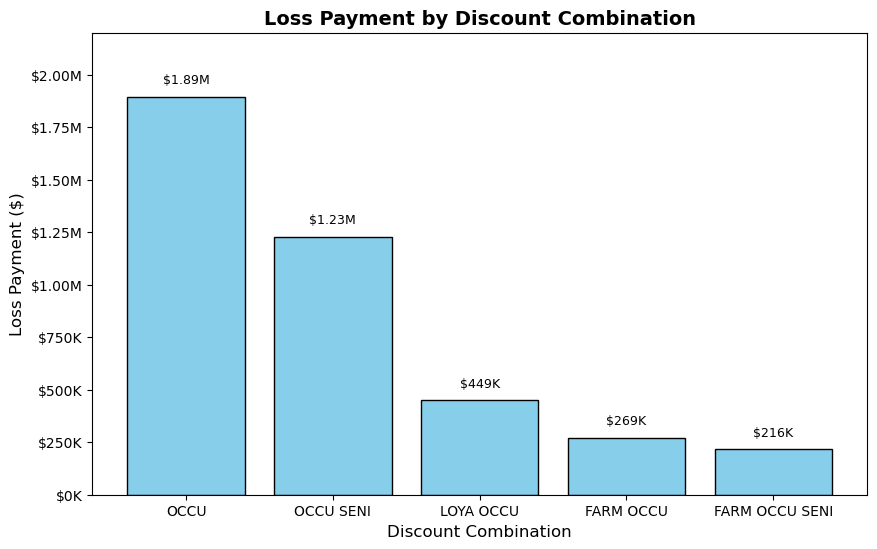

In [235]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Example data
x = top5_loss_earned_disc['DISCOUNT']
y = top5_loss_earned_disc['LOSS_PAYMENT']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, y, color='skyblue', edgecolor='black')

# Format y-axis to display thousands (K) and millions (M)
ax.yaxis.set_major_formatter(FuncFormatter(
    lambda x, _: f'${x / 1_000_000:,.2f}M' if x >= 1_000_000 else f'${x / 1000:,.0f}K'
))
ax.set_ylim(0, 2200000)  # Adjust y-axis range based on data
ax.yaxis.set_major_locator(MultipleLocator(250000))  # Set intervals of 250,000

# Add data labels on top of each bar with matching format
for bar in bars:
    bar_value = bar.get_height()
    label = (f'${bar_value / 1_000_000:,.2f}M' if bar_value >= 1_000_000 
             else f'${bar_value / 1000:,.0f}K')  # Match the y-axis format
    ax.text(bar.get_x() + bar.get_width() / 2, bar_value + 50000,  # Adjust offset
            label, ha='center', va='bottom', fontsize=9)

# Customize labels and title
ax.set_xlabel('Discount Combination', fontsize=12)
ax.set_ylabel('Loss Payment ($)', fontsize=12)
ax.set_title('Loss Payment by Discount Combination', fontsize=14, fontweight='bold')



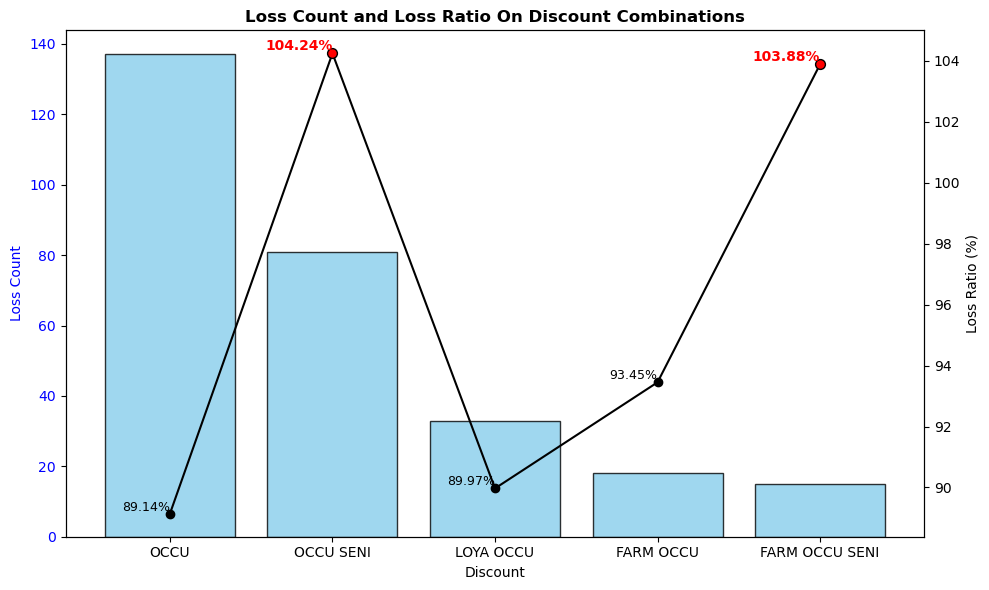

In [236]:
# Loss count vs Loss Ratio
from matplotlib.ticker import FuncFormatter, MultipleLocator

x = top5_loss_earned_disc['DISCOUNT']
y1 = top5_loss_earned_disc['LOSS_COUNT']
y2 = top5_loss_earned_disc['loss_ratio']


# loss ratio above 100% is considered as loss in insurance, setting threshold
threshold = 100

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line (Loss Count)
ax1.bar(x, y1, label='Loss Count', color='skyblue', edgecolor='black', alpha=0.8)
ax1.set_xlabel('Discount')
ax1.set_ylabel('Loss Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Create a second y-axis for the second line (Loss Ratio)
ax2 = ax1.twinx()
ax2.plot(x, y2, label='Loss Ratio', color='black', marker='o')
ax2.set_ylabel('Loss Ratio (%)', color='black')



for i, value in enumerate(y2):
    if value > threshold:
        ax2.scatter(x[i], value, color='red', s=50, edgecolor='black', zorder=2)  
        ax2.text(x[i], value, f'{value}%', color='red', ha='right', va='bottom', fontsize=10, fontweight='bold')
    else:
        ax2.text(x[i], value, f'{value}%', color='black', ha='right', va='bottom', fontsize=9)
    


plt.tight_layout()

plt.title('Loss Count and Loss Ratio On Discount Combinations', fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\Users\Jay\Desktop\DA\Insurance\Disc_comb_losscount.png", dpi=300, bbox_inches='tight')


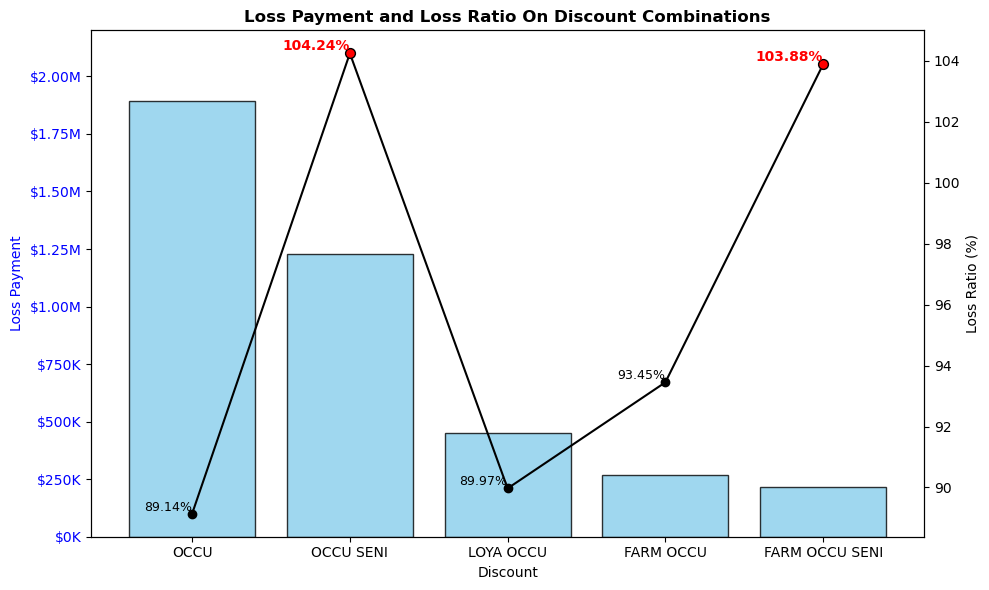

In [237]:
# Loss count vs Loss Ratio

x = top5_loss_earned_disc['DISCOUNT']
y3 = top5_loss_earned_disc['LOSS_PAYMENT']

# loss ratio above 100% is considered as loss in insurance, setting threshold
threshold = 100

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plot the first line (Loss Count)
ax1.bar(x, y3, label='Loss Payment', color='skyblue', edgecolor='black', alpha=0.8)
ax1.set_xlabel('Discount')
ax1.set_ylabel('Loss Payment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format y-axis to display thousands (K) and millions (M)
ax1.yaxis.set_major_formatter(FuncFormatter(
    lambda x, _: f'${x / 1_000_000:,.2f}M' if x >= 1_000_000 else f'${x / 1000:,.0f}K'
))
ax1.set_ylim(0, 2200000)  # Adjust y-axis range based on data
ax1.yaxis.set_major_locator(MultipleLocator(250000))  # Set intervals of 250,000


# Create a second y-axis for the second line (Loss Ratio)
ax2 = ax1.twinx()
ax2.plot(x, y2, label='Loss Ratio', color='black', marker='o')
ax2.set_ylabel('Loss Ratio (%)', color='black')


for i, value in enumerate(y2):
    if value > threshold:
        ax2.scatter(x[i], value, color='red', s=50, edgecolor='black', zorder=2)  
        ax2.text(x[i], value, f'{value}%', color='red', ha='right', va='bottom', fontsize=10, fontweight='bold')
    else:
        ax2.text(x[i], value, f'{value}%', color='black', ha='right', va='bottom', fontsize=9)
    


plt.tight_layout()

plt.title('Loss Payment and Loss Ratio On Discount Combinations', fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\Users\Jay\Desktop\DA\Insurance\Disc_comb_vs_Loss_payment.png", dpi=300, bbox_inches='tight')


## Second Chart | Written Premium Lost Due to Cancellation Accounts Trends

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
premium_rate = pd.read_csv(r"C:\Users\Jay\Desktop\DA\Insurance\Datasets\premium_data.csv", 
                           parse_dates=['EFFECTIVE_DATE', 'EXPIRY_DATE', 'TRANSACTION_DATE'])

C:\Users\Jay\AppData\Local\Temp\ipykernel_1884\4163464579.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  premium_rate = pd.read_csv(r"C:\Users\Jay\Desktop\DA\Insurance\Datasets\premium_data.csv",


In [239]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 200)
premium_rate.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR
0,WIN,2,1995-07-05,1996-07-04,1995-07-05,92,A,7,61,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1H6L7,NaN,9807600003715,404,92
1,WIN,9,1995-08-11,1996-08-10,1996-06-17,85,B,1,63,Y,1994,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,ACBF,0.0,K1L6S5,N,9807600005932,404,92
2,WIN,2,1995-08-28,1996-08-27,1996-03-20,90,B,7,49,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,BOIN,0.0,K1G3T9,N,9807600003034,404,92
3,WIN,2,1995-09-16,1996-09-15,1995-11-19,87,B,7,45,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.0,K1N1K2,NaN,9807600006712,404,92
4,WIN,2,1995-10-07,1996-10-06,1995-10-07,88,A,7,21,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1G3R8,NaN,9807600003023,404,92


In [240]:
premium_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449874 entries, 0 to 449873
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   BUSINESS_SECTION      449874 non-null  object        
 1   VEHICLE_NUMBER        449874 non-null  int64         
 2   EFFECTIVE_DATE        449874 non-null  datetime64[ns]
 3   EXPIRY_DATE           449874 non-null  datetime64[ns]
 4   TRANSACTION_DATE      449874 non-null  datetime64[ns]
 5   VEHICLE_MODEL_YEAR    449874 non-null  int64         
 6   CLIENT_CLASS          449874 non-null  object        
 7   CLIENT_RECORD         449874 non-null  int64         
 8   CLIENT_DATE_OF_BIRTH  449874 non-null  int64         
 9   DRIVER_TRAINING       449874 non-null  object        
 10  LICENSE_DATE          449874 non-null  int64         
 11  TRANSACTION_TYPE      449874 non-null  object        
 12  SUBSCRIPTION_YEAR     449874 non-null  int64         
 13 

In [241]:
premium_rate['YearMonth'] = premium_rate['TRANSACTION_DATE'].dt.strftime('%b')

In [242]:
premium_rate.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR,YearMonth
0,WIN,2,1995-07-05,1996-07-04,1995-07-05,92,A,7,61,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1H6L7,NaN,9807600003715,404,92,Jul
1,WIN,9,1995-08-11,1996-08-10,1996-06-17,85,B,1,63,Y,1994,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,ACBF,0.0,K1L6S5,N,9807600005932,404,92,Jun
2,WIN,2,1995-08-28,1996-08-27,1996-03-20,90,B,7,49,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,BOIN,0.0,K1G3T9,N,9807600003034,404,92,Mar
3,WIN,2,1995-09-16,1996-09-15,1995-11-19,87,B,7,45,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.0,K1N1K2,NaN,9807600006712,404,92,Nov
4,WIN,2,1995-10-07,1996-10-06,1995-10-07,88,A,7,21,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1G3R8,NaN,9807600003023,404,92,Oct


In [243]:
YR_MTH_97 = premium_rate[
    (premium_rate['TRANSACTION_DATE'].dt.year == 1997) & 
    (premium_rate['TRANSACTION_TYPE']=='TERMINATED')
]
YR_MTH_97.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR,YearMonth
15165,WIN,2,1996-10-17,1997-10-17,1997-04-20,94,B,7,39,Y,1983,TERMINATED,1996,URBAN,SENI,OCCU,NaN,NaN,0.0,ACBF,0.00,K1H8G1,N,9807600004025,404,92,Apr
15168,WIN,5,1996-10-19,1997-10-19,1997-01-18,93,B,7,42,Y,1984,TERMINATED,1996,URBAN,SENI,LOYA,NaN,NaN,0.0,BOIN,-0.23,K1H7P8,N,9807600003923,404,92,Jan
15177,WIN,5,1996-07-09,1997-07-09,1997-06-15,96,B,7,41,Y,1983,TERMINATED,1996,URBAN,SENI,LOYA,NaN,NaN,0.0,ACBF,0.00,K1H7S7,Y,9807600003940,404,92,Jun
15179,WIN,3,1996-09-01,1997-09-01,1997-03-05,92,B,7,55,Y,1987,TERMINATED,1996,URBAN,LOYA,NaN,NaN,NaN,0.0,BOIN,0.00,K1H8K2,Y,9807600004052,404,92,Mar
15185,WIN,3,1996-07-11,1997-07-11,1997-04-16,86,A,7,19,Y,1976,TERMINATED,1996,URBAN,OCCU,NaN,NaN,NaN,0.0,BOIN,0.00,K1H7C6,N,9807600003840,404,92,Apr


In [244]:
YR_MTH_97_summary = YR_MTH_97.groupby('YearMonth').agg(
    Written_premium=('COVERAGE_RATE', 'sum'),  
    Nr_of_cancelled=('SUBSCRIPTION_NUMBER', 'nunique')  
).abs().reset_index()
YR_MTH_97_summary.head()

,YearMonth,Written_premium,Nr_of_cancelled
0,Apr,179634.33,314
1,Aug,222568.08,302
2,Dec,196903.32,343
3,Feb,116736.84,162
4,Jan,106482.66,155


In [245]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

YR_MTH_97_summary['YearMonth'] = pd.Categorical(YR_MTH_97_summary['YearMonth'], 
                                         categories=month_order, 
                                         ordered=True)
YR_MTH_97_summary = YR_MTH_97_summary.sort_values('YearMonth')

In [246]:
YR_MTH_97_summary.head()

,YearMonth,Written_premium,Nr_of_cancelled
4,Jan,106482.66,155
3,Feb,116736.84,162
7,Mar,156624.57,218
0,Apr,179634.33,314
8,May,185851.50,363


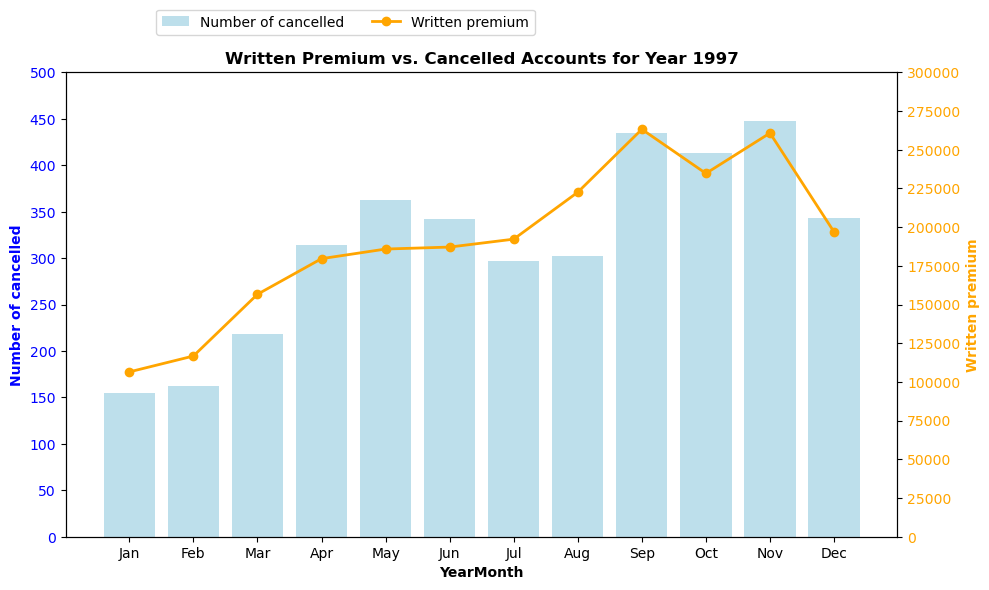

In [247]:
x = YR_MTH_97_summary['YearMonth'].astype(str)
y = YR_MTH_97_summary['Written_premium']
y2 = YR_MTH_97_summary['Nr_of_cancelled']

fig2, ax1 = plt.subplots(figsize=(10, 6))


# Plot the bar chart (Nr_of_cancelled)
ax1.bar(x, y2, color='lightblue', label='Number of cancelled', alpha=0.8)
ax1.set_xlabel('YearMonth', fontweight='bold')
ax1.set_ylabel('Number of cancelled', color='blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis for the line chart (COVERAGE_RATE)
ax2 = ax1.twinx()
ax2.plot(x, y, color='orange', marker='o', label='Written premium', linewidth=2)
ax2.set_ylabel('Written premium', color='orange', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, None)

# Set scale for Nr of cancelled accounts
ax1.set_ylim(0, 500) 
ax1.yaxis.set_major_locator(MultipleLocator(50))
# Set scale for Written Premium
ax2.set_ylim(0, 300000)  # Adjusted range based on data
ax2.yaxis.set_major_locator(MultipleLocator(25000))  # Interval of 25000

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=2)

# Add a title
plt.title('Written Premium vs. Cancelled Accounts for Year 1997', fontweight='bold')

# Show the chart
plt.tight_layout()
plt.savefig(r"C:\Users\Jay\Desktop\DA\Insurance\Written_Prem_VS_Cancelled_accts.png", dpi=300, bbox_inches='tight')  

## Third Chart | Premium rate and loss ratio vs Age group

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
premium_rate = pd.read_csv(r"C:\Users\Jay\Desktop\DA\Insurance\Datasets\premium_data.csv", dtype={'SUBSCRIPTION_NUMBER': str}, 
                           parse_dates=['EFFECTIVE_DATE', 'EXPIRY_DATE', 'TRANSACTION_DATE'])
claim = pd.read_csv(r"C:\Users\Jay\Desktop\DA\Insurance\Datasets\claim_data.csv", dtype={'CONVICTION': str, 'LOSS_REASON': str},
                    parse_dates=['EFFECTIVE_DATE', 'EXPIRY_DATE', 'ACCIDENT_DATE', 'REPORT_DATE'])

In [249]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   VEHICLE_NUMBER     382 non-null    int64         
 1   EFFECTIVE_DATE     382 non-null    datetime64[ns]
 2   EXPIRY_DATE        382 non-null    datetime64[ns]
 3   ACCIDENT_DATE      382 non-null    datetime64[ns]
 4   LOSS_PAYMENT       382 non-null    float64       
 5   REPORT_DATE        382 non-null    datetime64[ns]
 6   CONVICTION         382 non-null    object        
 7   LOSS_REASON        382 non-null    object        
 8   Subscriber_number  382 non-null    object        
dtypes: datetime64[ns](4), float64(1), int64(1), object(3)
memory usage: 27.0+ KB


In [250]:
premium_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449874 entries, 0 to 449873
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   BUSINESS_SECTION      449874 non-null  object        
 1   VEHICLE_NUMBER        449874 non-null  int64         
 2   EFFECTIVE_DATE        449874 non-null  datetime64[ns]
 3   EXPIRY_DATE           449874 non-null  datetime64[ns]
 4   TRANSACTION_DATE      449874 non-null  datetime64[ns]
 5   VEHICLE_MODEL_YEAR    449874 non-null  int64         
 6   CLIENT_CLASS          449874 non-null  object        
 7   CLIENT_RECORD         449874 non-null  int64         
 8   CLIENT_DATE_OF_BIRTH  449874 non-null  int64         
 9   DRIVER_TRAINING       449874 non-null  object        
 10  LICENSE_DATE          449874 non-null  int64         
 11  TRANSACTION_TYPE      449874 non-null  object        
 12  SUBSCRIPTION_YEAR     449874 non-null  int64         
 13 

In [251]:
premium_rate.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR
0,WIN,2,1995-07-05,1996-07-04,1995-07-05,92,A,7,61,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1H6L7,NaN,9807600003715,404,92
1,WIN,9,1995-08-11,1996-08-10,1996-06-17,85,B,1,63,Y,1994,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,ACBF,0.0,K1L6S5,N,9807600005932,404,92
2,WIN,2,1995-08-28,1996-08-27,1996-03-20,90,B,7,49,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,BOIN,0.0,K1G3T9,N,9807600003034,404,92
3,WIN,2,1995-09-16,1996-09-15,1995-11-19,87,B,7,45,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.0,K1N1K2,NaN,9807600006712,404,92
4,WIN,2,1995-10-07,1996-10-06,1995-10-07,88,A,7,21,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1G3R8,NaN,9807600003023,404,92


In [252]:
premium_rate['CLIENT_DATE_OF_BIRTH'].value_counts()

CLIENT_DATE_OF_BIRTH
 50    12528
 52    12159
 59    12060
 54    11934
 56    11457
       ...  
 1       234
 3       225
-1       108
 79       18
 0        18
Name: count, Length: 81, dtype: int64

In [253]:
premium_rate[premium_rate['CLIENT_DATE_OF_BIRTH'] <=10]

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR
156,WIN,2,1995-09-15,1996-09-14,1996-04-19,95,A,1,4,Y,1977,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,0.0,BOIN,0.00,K1J6L6,N,9807600004244,404,92
173,WIN,2,1995-09-15,1996-09-14,1995-09-15,90,A,1,4,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.00,K1J6L6,NaN,9807600004244,404,92
240,WIN,2,1995-07-03,1996-07-02,1995-07-03,88,A,1,8,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.00,K1N8W5,NaN,9807600007275,404,92
272,WIN,2,1995-09-15,1996-09-14,1995-09-15,90,A,1,4,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.00,K1J6L6,NaN,9807600004244,639,98
334,WIN,2,1995-08-17,1996-08-16,1996-05-28,90,A,7,9,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,ACBF,0.00,K1N5C3,N,9807600006736,639,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449523,WIN,2,1997-10-25,1998-10-25,1997-10-25,89,A,7,7,Y,1934,ACTIVE,1997,URBAN,OCCU,NaN,NaN,NaN,0.0,BOIN,0.00,K1G3C8,N,9807600002964,927,7
449748,WIN,2,1997-06-06,1998-06-07,1997-10-04,83,A,7,4,Y,1981,TERMINATED,1997,URBAN,OCCU,NaN,NaN,NaN,0.0,ACBF,-215.62,K1A0R3,N,9807600000373,927,7
449766,WIN,2,1997-10-21,1998-10-21,1997-10-21,92,A,1,5,Y,1987,ACTIVE,1997,URBAN,OCCU,NaN,NaN,NaN,0.0,ACBF,0.00,K1A0H8,N,9807600000330,927,7
449782,WIN,2,1997-01-30,1998-01-30,1997-01-30,78,C,7,9,Y,1936,ACTIVE,1997,RURAL,FARM,OCCU,NaN,NaN,0.0,PGDG,0.00,K1N8L3,N,9807600007234,927,7


In [254]:
premium_rate = premium_rate[premium_rate['CLIENT_DATE_OF_BIRTH']>=10]
premium_rate['CLIENT_DATE_OF_BIRTH'] = '19' + premium_rate['CLIENT_DATE_OF_BIRTH'].astype(str)

In [255]:
premium_rate.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR
0,WIN,2,1995-07-05,1996-07-04,1995-07-05,92,A,7,1961,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1H6L7,NaN,9807600003715,404,92
1,WIN,9,1995-08-11,1996-08-10,1996-06-17,85,B,1,1963,Y,1994,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,ACBF,0.0,K1L6S5,N,9807600005932,404,92
2,WIN,2,1995-08-28,1996-08-27,1996-03-20,90,B,7,1949,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,BOIN,0.0,K1G3T9,N,9807600003034,404,92
3,WIN,2,1995-09-16,1996-09-15,1995-11-19,87,B,7,1945,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.0,K1N1K2,NaN,9807600006712,404,92
4,WIN,2,1995-10-07,1996-10-06,1995-10-07,88,A,7,1921,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1G3R8,NaN,9807600003023,404,92


In [256]:
premium_rate['CLIENT_DATE_OF_BIRTH'] = premium_rate['CLIENT_DATE_OF_BIRTH'].astype('int64')
premium_rate['Age'] = premium_rate['SUBSCRIPTION_YEAR'] - premium_rate['CLIENT_DATE_OF_BIRTH']

In [257]:
premium_rate['Age'].describe()

count    445149.000000
mean         49.647925
std          15.442724
min          18.000000
25%          38.000000
50%          48.000000
75%          61.000000
max          87.000000
Name: Age, dtype: float64

In [258]:
bins = [0, 26, 35, 45, 55, 65, 75, float('inf')]
labels = ['25 and less', '26-34', '35-44', '45-54', '55-64', '65-74', '75 and older']
premium_rate['age_range'] = pd.cut(premium_rate['Age'], bins=bins, labels=labels, right=False)
premium_rate.head()

,BUSINESS_SECTION,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,VEHICLE_MODEL_YEAR,CLIENT_CLASS,CLIENT_RECORD,CLIENT_DATE_OF_BIRTH,DRIVER_TRAINING,LICENSE_DATE,TRANSACTION_TYPE,SUBSCRIPTION_YEAR,AREA_TYPE,DISCOUNT1,DISCOUNT2,DISCOUNT3,DISCOUNT4,CONVCTION,COVER_TYPE,COVERAGE_RATE,POSTAL_CODE,LEASE_BUY,SUBSCRIPTION_NUMBER,CARNUM,MANU_YR,Age,age_range
0,WIN,2,1995-07-05,1996-07-04,1995-07-05,92,A,7,1961,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1H6L7,NaN,9807600003715,404,92,34,26-34
1,WIN,9,1995-08-11,1996-08-10,1996-06-17,85,B,1,1963,Y,1994,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,ACBF,0.0,K1L6S5,N,9807600005932,404,92,32,26-34
2,WIN,2,1995-08-28,1996-08-27,1996-03-20,90,B,7,1949,Y,1977,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,0.0,BOIN,0.0,K1G3T9,N,9807600003034,404,92,46,45-54
3,WIN,2,1995-09-16,1996-09-15,1995-11-19,87,B,7,1945,Y,2007,TERMINATED,1995,URBAN,NaN,NaN,NaN,NaN,NaN,ACBF,0.0,K1N1K2,NaN,9807600006712,404,92,50,45-54
4,WIN,2,1995-10-07,1996-10-06,1995-10-07,88,A,7,1921,Y,2007,ACTIVE,1995,URBAN,NaN,NaN,NaN,NaN,NaN,BOIN,0.0,K1G3R8,NaN,9807600003023,404,92,74,65-74


In [259]:
premium_rate = premium_rate.sort_values(by=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'])
premium_rate_uniq = premium_rate.drop_duplicates(subset=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'],keep='last')
premium_rate_uniq = premium_rate_uniq[['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE', 'age_range']]

In [260]:
premium_rate_uniq.shape

(15902, 4)

In [261]:
earned_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47651 entries, 0 to 47778
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   VEHICLE_NUMBER       47651 non-null  int64         
 1   EFFECTIVE_DATE       47651 non-null  datetime64[ns]
 2   EXPIRY_DATE          47651 non-null  datetime64[ns]
 3   TRANSACTION_DATE     47651 non-null  datetime64[ns]
 4   subscription_number  47651 non-null  object        
 5   EARNED_RATE          47651 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [262]:
earned_rate.head(20)

,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,subscription_number,EARNED_RATE
0,2,1996-04-14,1997-04-14,1996-04-14,00000001,529.67
1,2,1996-04-14,1997-04-14,1997-01-16,00000001,-14.98
2,2,1997-04-14,1998-04-14,1997-04-14,00000001,124.77
3,2,1997-04-14,1998-04-14,1997-04-14,00000001,458.23
4,2,1997-04-14,1998-04-15,1997-06-17,00000001,0.00
5,2,1997-04-14,1998-04-15,1997-06-17,00000001,0.02
6,2,1997-04-14,1998-04-15,1997-06-18,00000001,-0.97
7,2,1997-04-14,1998-04-15,1997-06-18,00000001,-0.05
8,2,1997-04-14,1998-04-15,1997-06-25,00000001,0.00
9,2,1997-04-14,1998-04-15,1998-02-21,00000001,0.00


In [263]:
earned_rate.describe()

,VEHICLE_NUMBER,EFFECTIVE_DATE,EXPIRY_DATE,TRANSACTION_DATE,EARNED_RATE
count,47651.000000,47651,47651,47651,47651.000000
mean,2.666345,1997-02-25 10:38:57.948836480,1998-01-31 10:36:47.399634944,1997-05-09 08:16:14.283855616,121.430741
min,1.000000,1995-07-03 00:00:00,1996-07-02 00:00:00,1995-07-03 00:00:00,-2255.490000
25%,2.000000,1996-09-19 00:00:00,1997-08-26 00:00:00,1996-11-28 00:00:00,0.000000
50%,2.000000,1997-04-13 00:00:00,1998-03-10 00:00:00,1997-05-31 00:00:00,62.910000
75%,3.000000,1997-08-10 00:00:00,1998-07-24 00:00:00,1997-10-15 00:00:00,234.130000
max,9.000000,1997-12-31 00:00:00,1999-01-01 00:00:00,1998-12-19 00:00:00,2808.150000
std,1.133393,NaN,NaN,NaN,247.504082


In [264]:
# data validation
print(earned_rate[earned_rate['EFFECTIVE_DATE']> earned_rate['EXPIRY_DATE']])
print(earned_rate[earned_rate['TRANSACTION_DATE']<earned_rate['EFFECTIVE_DATE']])

Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, TRANSACTION_DATE, subscription_number, EARNED_RATE]
Index: []
Empty DataFrame
Columns: [VEHICLE_NUMBER, EFFECTIVE_DATE, EXPIRY_DATE, TRANSACTION_DATE, subscription_number, EARNED_RATE]
Index: []


In [265]:
earned_rate['VEHICLE_NUMBER'].value_counts()

VEHICLE_NUMBER
2    29277
3    10956
4     3983
5     1585
6      856
7      510
8      175
9      170
1      139
Name: count, dtype: int64

In [266]:
earned_rate = earned_rate[earned_rate['VEHICLE_NUMBER']!='*']
earned_rate['VEHICLE_NUMBER'].value_counts()
earned_rate['VEHICLE_NUMBER'] = earned_rate['VEHICLE_NUMBER'].astype('int64')


In [267]:
earned_rate['subscription_number'] = earned_rate['subscription_number'].astype(str).str[-8:]
claim['Subscriber_number'] = claim['Subscriber_number'].astype(str).str[-8:]
premium_rate_uniq['SUBSCRIPTION_NUMBER'] = premium_rate_uniq['SUBSCRIPTION_NUMBER'].astype(str).str[-8:]

earned_age_range = earned_rate.merge(premium_rate_uniq, how='left',left_on=['subscription_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'] ,
            right_on=['SUBSCRIPTION_NUMBER', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'])


In [268]:
earned_age_range.shape

(47651, 8)

In [269]:
earned_summary = earned_age_range.groupby(
    ['subscription_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE', 'age_range'],observed=True)['EARNED_RATE'].sum().reset_index()

In [270]:
earned_summary.head()

,subscription_number,VEHICLE_NUMBER,EFFECTIVE_DATE,age_range,EARNED_RATE
0,00000001,2,1996-04-14,45-54,514.69
1,00000001,2,1997-04-14,45-54,582.00
2,00000001,3,1996-04-14,45-54,504.50
3,00000001,3,1997-04-14,45-54,564.04
4,00000001,4,1997-04-14,45-54,5.19


In [271]:
earned_loss = earned_summary.merge(claim, how='left', left_on=['subscription_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE'],
                                   right_on=['Subscriber_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE']
                                  )[['subscription_number', 'VEHICLE_NUMBER', 'EFFECTIVE_DATE', 'EARNED_RATE', 'LOSS_PAYMENT', 'age_range']]

In [272]:
earned_loss.head()

,subscription_number,VEHICLE_NUMBER,EFFECTIVE_DATE,EARNED_RATE,LOSS_PAYMENT,age_range
0,00000001,2,1996-04-14,514.69,NaN,45-54
1,00000001,2,1997-04-14,582.00,25020.0,45-54
2,00000001,3,1996-04-14,504.50,NaN,45-54
3,00000001,3,1997-04-14,564.04,NaN,45-54
4,00000001,4,1997-04-14,5.19,NaN,45-54


In [273]:
earned_loss2 = earned_loss.groupby('age_range').agg(
    earned_premium=("EARNED_RATE", "sum"),
    sum_loss=("LOSS_PAYMENT", "sum")
).reset_index()

C:\Users\Jay\AppData\Local\Temp\ipykernel_1884\3821407743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  earned_loss2 = earned_loss.groupby('age_range').agg(


In [274]:
earned_loss2.head()

,age_range,earned_premium,sum_loss
0,25 and less,376718.54,367632.0
1,26-34,734522.17,724590.0
2,35-44,1211119.96,1158930.0
3,45-54,1284115.92,1195380.0
4,55-64,851762.79,854730.0


In [275]:
earned_loss2['loss_ratio'] = earned_loss2['sum_loss']/earned_loss2['earned_premium'] * 100

In [276]:
earned_loss2.head(10)

,age_range,earned_premium,sum_loss,loss_ratio
0,25 and less,376718.54,367632.0,97.587976
1,26-34,734522.17,724590.0,98.647805
2,35-44,1211119.96,1158930.0,95.690769
3,45-54,1284115.92,1195380.0,93.089727
4,55-64,851762.79,854730.0,100.348361
5,65-74,669179.54,617130.0,92.221887
6,75 and older,581669.38,501840.0,86.275815


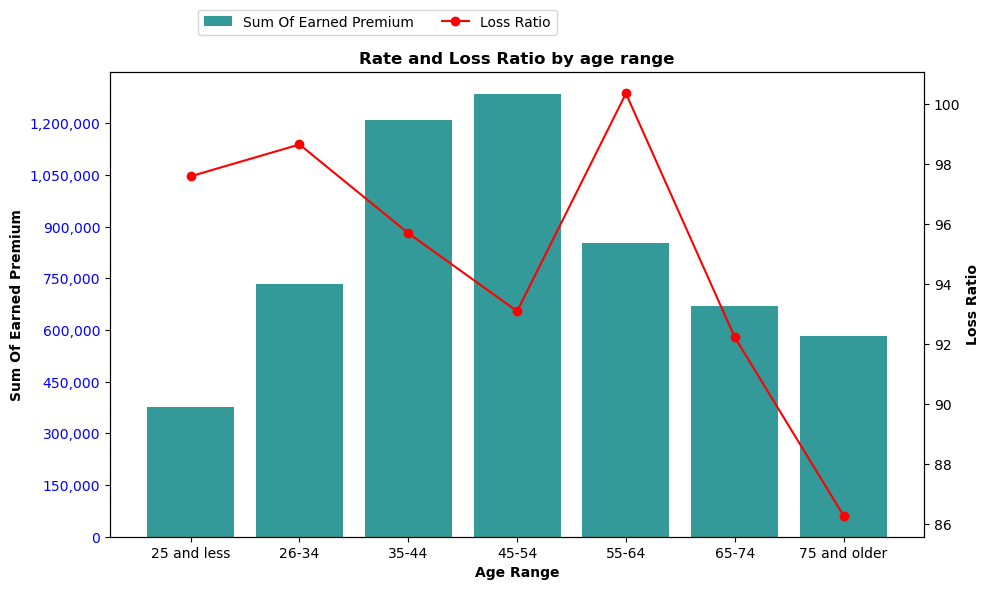

In [277]:
fig3, ax1 = plt.subplots(figsize=(10, 6))

x=earned_loss2['age_range']
y=earned_loss2['earned_premium']
y2=earned_loss2['loss_ratio']
# Bar chart for Sum Of Earned Premium
ax1.bar(x, y, color='teal', label='Sum Of Earned Premium', alpha=0.8)
ax1.set_xlabel('Age Range', fontweight='bold')
ax1.set_ylabel('Sum Of Earned Premium', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')


# show all integer values
import matplotlib.ticker as ticker
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Line chart for Loss ratio
ax2 = ax1.twinx()
ax2.plot(x, y2, color='red' , marker='o', label='Loss Ratio')
ax2.set_ylabel('Loss Ratio', fontweight='bold')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=2)


# Add a title
plt.title('Rate and Loss Ratio by age range', fontweight='bold')

# Show the chart
plt.tight_layout()
plt.savefig(r"C:\Users\Jay\Desktop\DA\Insurance\RateAndLossRatio_vs_age_range.png", dpi=300, bbox_inches='tight')  


## Credit Score group vs Churn rate

In [278]:
import pandas as pd
CRDT = pd.read_fwf(r"C:\Users\Jay\Desktop\DA\Insurance\Datasets\CRDT.txt", 
                   colspecs=[
                       (0,6),
                       (20,28)
                   ] , 
                   names=['credit', 'subscriber_number'], 
                   dtype={'credit': float, 'subscriber_number': str})


In [279]:
CRDT.tail()

,credit,subscriber_number
7278,759.00,00007231
7279,797.00,00007244
7280,754.00,00007257
7281,802.00,00007270
7282,810.65,00008765


In [280]:
CRDT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7283 entries, 0 to 7282
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit             6188 non-null   float64
 1   subscriber_number  7283 non-null   object 
dtypes: float64(1), object(1)
memory usage: 113.9+ KB


In [281]:
CRDT.isna().sum()

credit               1095
subscriber_number       0
dtype: int64

#### After discussing with the stakeholders,they decided to fill in the missing credit scores with the average score based on the same postal code

In [282]:
premium_rate = pd.read_csv(r"C:\Users\Jay\Desktop\DA\Insurance\Datasets\premium_data.csv", dtype={'SUBSCRIPTION_NUMBER': str}, 
                           parse_dates=['TRANSACTION_DATE'])

In [283]:
premium_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449874 entries, 0 to 449873
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   BUSINESS_SECTION      449874 non-null  object        
 1   VEHICLE_NUMBER        449874 non-null  int64         
 2   EFFECTIVE_DATE        449874 non-null  object        
 3   EXPIRY_DATE           449874 non-null  object        
 4   TRANSACTION_DATE      449874 non-null  datetime64[ns]
 5   VEHICLE_MODEL_YEAR    449874 non-null  int64         
 6   CLIENT_CLASS          449874 non-null  object        
 7   CLIENT_RECORD         449874 non-null  int64         
 8   CLIENT_DATE_OF_BIRTH  449874 non-null  int64         
 9   DRIVER_TRAINING       449874 non-null  object        
 10  LICENSE_DATE          449874 non-null  int64         
 11  TRANSACTION_TYPE      449874 non-null  object        
 12  SUBSCRIPTION_YEAR     449874 non-null  int64         
 13 

In [284]:
uniq_sub = premium_rate.drop_duplicates(subset=['SUBSCRIPTION_NUMBER', 'POSTAL_CODE'])

In [285]:
uniq_sub = premium_rate[['SUBSCRIPTION_NUMBER', 'POSTAL_CODE']].drop_duplicates()

In [286]:
uniq_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 357841
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SUBSCRIPTION_NUMBER  7372 non-null   object
 1   POSTAL_CODE          7354 non-null   object
dtypes: object(2)
memory usage: 172.8+ KB


In [287]:
CRDT['subscriber_number'] = '98076'+ CRDT['subscriber_number']
CRDT.head()

,credit,subscriber_number
0,677.0,9807600000001
1,781.0,9807600000003
2,669.0,9807600000004
3,645.0,9807600000005
4,682.0,9807600000006


In [288]:
CRDT2 = CRDT.merge(uniq_sub, how='left', left_on='subscriber_number', right_on='SUBSCRIPTION_NUMBER')

In [289]:
CRDT2.isna().sum()

credit                 1105
subscriber_number         0
SUBSCRIPTION_NUMBER       4
POSTAL_CODE              16
dtype: int64

In [290]:
CRDT2['credit'] = CRDT2['credit'].fillna(
    CRDT2.groupby('POSTAL_CODE')['credit'].transform('mean')
)


In [291]:
CRDT2.isna().sum()

credit                 1099
subscriber_number         0
SUBSCRIPTION_NUMBER       4
POSTAL_CODE              16
dtype: int64

#### After discussing with stakeholders, they would like to group credit scores as 0–580, 581–650, and 651 and above.

In [292]:
rate_with_credit = premium_rate.merge(CRDT2, how='left', left_on='SUBSCRIPTION_NUMBER',right_on='subscriber_number')

In [293]:
bins = [0, 580, 650, float('inf')]
labels =['0-580', '581-650', '651 and above']
rate_with_credit['CREDIT_GROUP'] = pd.cut(rate_with_credit['credit'], bins=bins, labels=labels)

In [294]:
rate_with_credit['CREDIT_GROUP'].value_counts()

CREDIT_GROUP
651 and above    318825
581-650           50049
0-580             23094
Name: count, dtype: int64

In [295]:
CRDT2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   credit               6271 non-null   float64
 1   subscriber_number    7370 non-null   object 
 2   SUBSCRIPTION_NUMBER  7366 non-null   object 
 3   POSTAL_CODE          7354 non-null   object 
dtypes: float64(1), object(3)
memory usage: 230.4+ KB


In [296]:
rate_with_credit['YR_MONTH'] = rate_with_credit['TRANSACTION_DATE'].dt.strftime('%b%Y').str.upper()

In [297]:
Rate_with_credit2 = rate_with_credit[rate_with_credit['TRANSACTION_DATE'].dt.year==1997]

In [298]:
Rate_with_credit2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268578 entries, 15165 to 457118
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   BUSINESS_SECTION       268578 non-null  object        
 1   VEHICLE_NUMBER         268578 non-null  int64         
 2   EFFECTIVE_DATE         268578 non-null  object        
 3   EXPIRY_DATE            268578 non-null  object        
 4   TRANSACTION_DATE       268578 non-null  datetime64[ns]
 5   VEHICLE_MODEL_YEAR     268578 non-null  int64         
 6   CLIENT_CLASS           268578 non-null  object        
 7   CLIENT_RECORD          268578 non-null  int64         
 8   CLIENT_DATE_OF_BIRTH   268578 non-null  int64         
 9   DRIVER_TRAINING        268578 non-null  object        
 10  LICENSE_DATE           268578 non-null  int64         
 11  TRANSACTION_TYPE       268578 non-null  object        
 12  SUBSCRIPTION_YEAR      268578 non-null  int64

In [299]:
Rate_with_credit3 = Rate_with_credit2.groupby(['YR_MONTH', 'CREDIT_GROUP', 'TRANSACTION_TYPE'],
                                             as_index=False).agg(account_cnt=('subscriber_number','nunique'))[['YR_MONTH', 'CREDIT_GROUP', 'TRANSACTION_TYPE','account_cnt']]

C:\Users\Jay\AppData\Local\Temp\ipykernel_1884\3845055092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Rate_with_credit3 = Rate_with_credit2.groupby(['YR_MONTH', 'CREDIT_GROUP', 'TRANSACTION_TYPE'],


In [300]:
Rate_with_credit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   YR_MONTH          72 non-null     object  
 1   CREDIT_GROUP      72 non-null     category
 2   TRANSACTION_TYPE  72 non-null     object  
 3   account_cnt       72 non-null     int64   
dtypes: category(1), int64(1), object(2)
memory usage: 2.0+ KB


In [301]:
Rate_with_credit3.head()

,YR_MONTH,CREDIT_GROUP,TRANSACTION_TYPE,account_cnt
0,APR1997,0-580,ACTIVE,40
1,APR1997,0-580,TERMINATED,14
2,APR1997,581-650,ACTIVE,84
3,APR1997,581-650,TERMINATED,36
4,APR1997,651 and above,ACTIVE,492


In [302]:
Rate_with_credit4 = Rate_with_credit3.pivot_table(
    index=['YR_MONTH', 'CREDIT_GROUP'],
    columns='TRANSACTION_TYPE',
    values='account_cnt'
).reset_index()

C:\Users\Jay\AppData\Local\Temp\ipykernel_1884\2267142686.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Rate_with_credit4 = Rate_with_credit3.pivot_table(


In [303]:
print(Rate_with_credit4.columns)

Index(['YR_MONTH', 'CREDIT_GROUP', 'ACTIVE', 'TERMINATED'], dtype='object', name='TRANSACTION_TYPE')


In [304]:
Rate_with_credit4.columns.name = None

In [305]:
Rate_with_credit4.head()

,YR_MONTH,CREDIT_GROUP,ACTIVE,TERMINATED
0,APR1997,0-580,40.0,14.0
1,APR1997,581-650,84.0,36.0
2,APR1997,651 and above,492.0,185.0
3,AUG1997,0-580,46.0,16.0
4,AUG1997,581-650,91.0,29.0


In [306]:
Rate_with_credit4['Churn_Rate'] = (
    Rate_with_credit4['TERMINATED'] / Rate_with_credit4['ACTIVE']
).apply(lambda x: f"{x * 100:.2f}%")

In [307]:
Rate_with_credit4.head()

,YR_MONTH,CREDIT_GROUP,ACTIVE,TERMINATED,Churn_Rate
0,APR1997,0-580,40.0,14.0,35.00%
1,APR1997,581-650,84.0,36.0,42.86%
2,APR1997,651 and above,492.0,185.0,37.60%
3,AUG1997,0-580,46.0,16.0,34.78%
4,AUG1997,581-650,91.0,29.0,31.87%


In [308]:
# Convert YR_MONTH to datetime
Rate_with_credit4['YR_MONTH'] = pd.to_datetime(Rate_with_credit4['YR_MONTH'], format='%b%Y')
Rate_with_credit4.sort_values(["YR_MONTH","CREDIT_GROUP"], inplace=True)
Rate_with_credit4['YR_MONTH'] = Rate_with_credit4['YR_MONTH'].dt.strftime('%b%Y')

Rate_with_credit4.head()




,YR_MONTH,CREDIT_GROUP,ACTIVE,TERMINATED,Churn_Rate
12,Jan1997,0-580,17.0,9.0,52.94%
13,Jan1997,581-650,41.0,21.0,51.22%
14,Jan1997,651 and above,308.0,107.0,34.74%
9,Feb1997,0-580,21.0,11.0,52.38%
10,Feb1997,581-650,43.0,12.0,27.91%


In [309]:
Rate_with_credit4[['ACTIVE', 'TERMINATED']] = Rate_with_credit4[['ACTIVE', 'TERMINATED']].astype('int64')

In [310]:
Rate_with_credit4.head(50)

,YR_MONTH,CREDIT_GROUP,ACTIVE,TERMINATED,Churn_Rate
12,Jan1997,0-580,17,9,52.94%
13,Jan1997,581-650,41,21,51.22%
14,Jan1997,651 and above,308,107,34.74%
9,Feb1997,0-580,21,11,52.38%
10,Feb1997,581-650,43,12,27.91%
11,Feb1997,651 and above,283,115,40.64%
21,Mar1997,0-580,30,10,33.33%
22,Mar1997,581-650,52,20,38.46%
23,Mar1997,651 and above,410,139,33.90%
0,Apr1997,0-580,40,14,35.00%


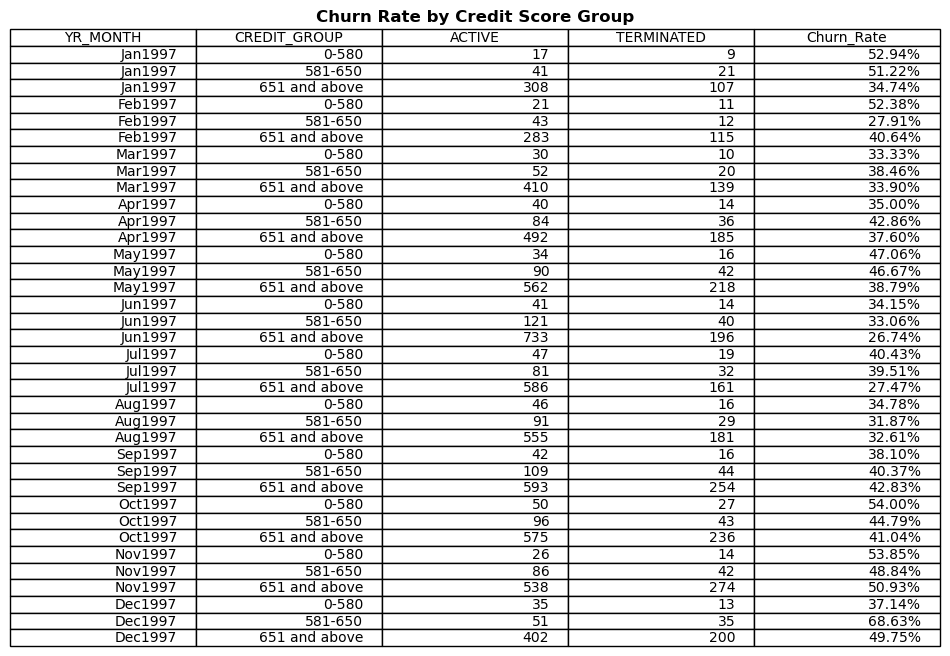

In [311]:
import matplotlib.pyplot as plt
fig4, ax = plt.subplots(figsize=(12, 8)) 
ax.axis('off')
ax.table(cellText=Rate_with_credit4.values, colLabels=Rate_with_credit4.columns, loc='center')

plt.title('Churn Rate by Credit Score Group', fontweight='bold')
plt.savefig(r"C:\Users\Jay\Desktop\DA\Insurance\credit_score_vs_churn_rate.png", dpi=300, bbox_inches='tight')  # Save table as image